In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# f(x) = x^3 + 3x^2 + 2sin(x) + 1

In [3]:
x = np.linspace(-5, 5, 100)

In [4]:
def f(x):
    return x ** 2 + 5 * np.sin(x)

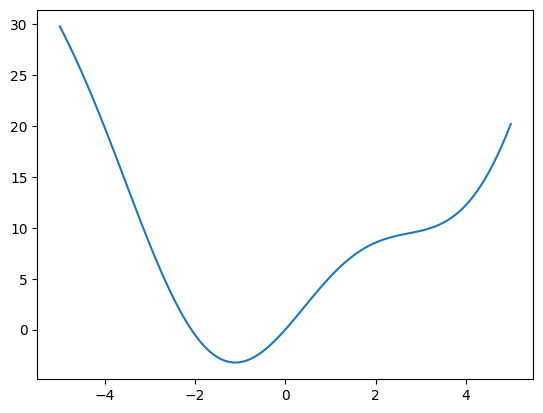

In [5]:
plt.plot(x, f(x));

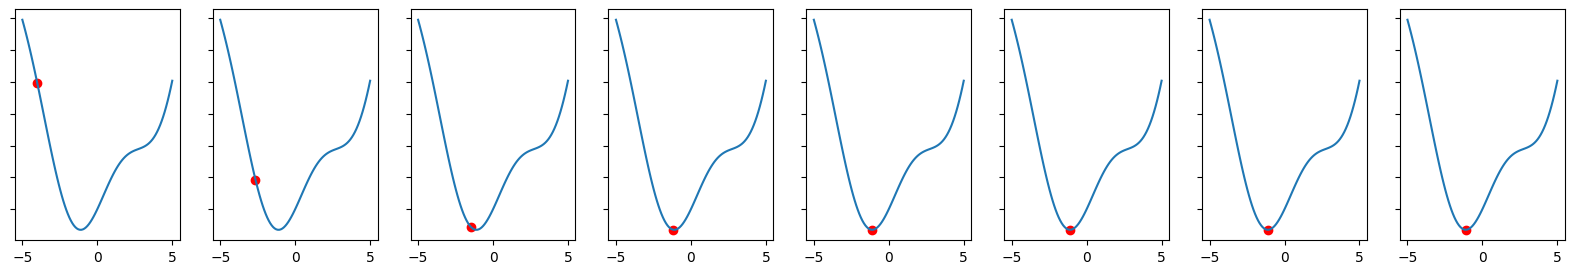

In [6]:
def grad(x):
    return 2 * x + 5 * np.cos(x)


def find_grad():
    cur = -4
    learning_rate = 0.12
    interval = 0
    fig, ax = plt.subplots(figsize=(20, 3), nrows=1, ncols=8)
    
    while True:
        if abs(grad(cur)) <= 1e-3:
            break
            
        ax[interval].plot(x, f(x))
        ax[interval].set_yticklabels([])
        ax[interval].scatter(cur, f(cur), c="r")
        cur -= learning_rate * grad(cur)
        
        interval += 1
            
    
find_grad()

[[-0.9180575   4.05167736]]
[[-0.91120388  4.05117153]]


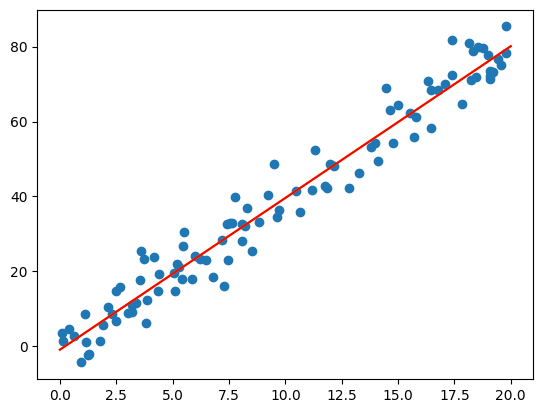

In [7]:
# GD for Linear Regression model

from sklearn.linear_model import LinearRegression


X_train = 20 * np.random.rand(100, 1)
y_train = 4 * X_train + 5 * np.random.randn(100, 1)
plt.scatter(X_train, y_train)

X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)

### ---------------------------- Sklearn Model

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

w = model.coef_
X_test = np.linspace(0, 20, 10)
y_test = np.array([w[0][0] + w[0][1] * x for x in X_test])

plt.plot(X_test, y_test, c="y");
print(w)

### ---------------------------- Calculate w base on Gradient Descent
# Loss function =  1   *   | Y - X^T @ w | (2, 2)
#                  2N
# => GD = 1 / N * X @ (X^T @ w - y)
# => Tìm nghiệm theo w => xem X là các constant
# => Loss(w) => 

def grad(X, y, w):
    return 1 / X.shape[0] * X.T @ (X @ w - y)  


def predict():
    w = np.array([[2.], [1.]])
    learning_rate = 0.01
    
    while True:
        if np.linalg.norm(grad(X_train, y_train, w)) / len(w) < 1e-3:
            return w.T
            
        w -= learning_rate * grad(X_train, y_train, w)
        
        
w = predict()
X_test = np.linspace(0, 20, 10)
y_test = np.array([w[0][0] + w[0][1] * x for x in X_test])
plt.plot(X_test, y_test, c="r");

print(w)

Convergence after:  144
Convergence after:  17


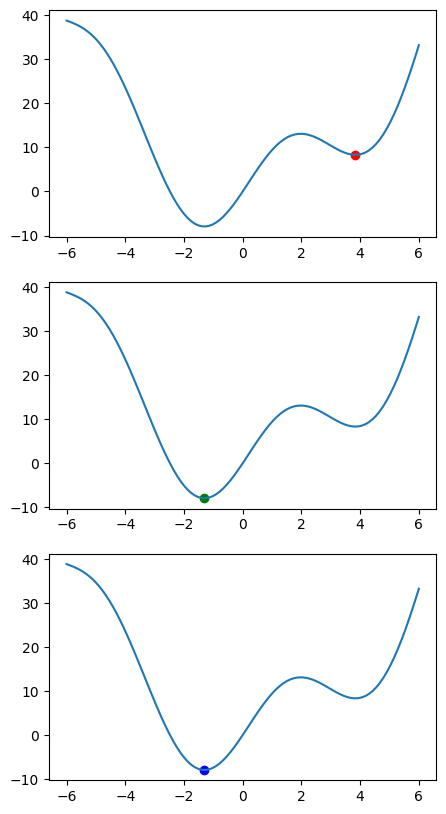

In [49]:
# Gradient Descent with Momentum
X = np.linspace(-6, 6, 100)
y = X ** 2 + 10 * np.sin(X)
fig, ax = plt.subplots(figsize=(5, 10), nrows=3, ncols=1)

ax[0].plot(X, y)
ax[1].plot(X, y)
ax[2].plot(X, y)

learning_rate = 0.1


def grad(x):
    return 2 * x + 10 * np.cos(x)


def f(x):
    return x ** 2 + 10 * np.sin(x)


# Without momentum
x = 6

for it in range(500):
    if abs(grad(x)) < 1e-3:
        break
    
    x -= learning_rate * grad(x)
    
ax[0].scatter(x, f(x), c="r")


# With momentum
x = 6
v = 0

for it in range(500):
    if abs(grad(x)) < 1e-3:
        print("Convergence after: ", it)
        break
    
    v = 0.9 * v + learning_rate * grad(x)
    x -= v

ax[1].scatter(x, f(x), c="g");


# With Nesterov
x = 6
v = 0

for it in range(500):
    if abs(grad(x)) < 1e-3:
        print("Convergence after: ", it)
        break
    
    v = 0.9 * v + learning_rate * grad(x - 0.9 * v)
    x -= v

ax[2].scatter(x, f(x), c="b");